# Restaurant Data EDA

In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from glob import glob

import seaborn as sns
sns.set()
# sns.set_style('whitegrid')
# sns.set_context("poster")

In [2]:
def time_marker(text=''):
    print('[{}] {}'.format(datetime.datetime.now().time(), text))

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import matplotlib
font = {'size' : 50}
matplotlib.rc('font', **font)

TITLE_FONT_SIZE = 25
LABEL_FONT_SIZE = 15
TICK_FONT_SIZE  = 15

FIG_SIZE = (15,6)
FIG_SIZE_SQUARE = (15,15)
DO_WRITE_CHARTS = True

# Load Restaurant Data

In [4]:
time_marker(text='Loading Non Fast Food Data...')
nff_restaurants = pd.read_csv('../clean_data/az_restaurant_non_fast_food_business_clean.csv', index_col=0)
nff_restaurants.reset_index(inplace=True, drop=True)
nff_restaurants['is_fast_food'] = 0
time_marker(text='Complete!')

time_marker(text='Loading Fast Food Data...')
ff_restaurants = pd.read_csv('../clean_data/az_restaurant_fast_food_business_clean.csv', index_col=0)
ff_restaurants.reset_index(inplace=True, drop=True)
ff_restaurants['is_fast_food'] = 1
time_marker(text='Complete!')

restaurants = pd.concat([nff_restaurants, ff_restaurants])
restaurants.drop(['neighborhood'], axis=1, inplace=True)
restaurants.reset_index(inplace=True, drop=True)

[00:46:12.993763] Loading Non Fast Food Data...
[00:46:13.061458] Complete!
[00:46:13.061674] Loading Fast Food Data...
[00:46:13.120302] Complete!


In [5]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7066 entries, 0 to 7065
Data columns (total 10 columns):
address         7038 non-null object
business_id     7066 non-null object
categories      7066 non-null object
city            7066 non-null object
is_open         7066 non-null int64
name            7066 non-null object
postal_code     7059 non-null float64
review_count    7066 non-null int64
stars           7066 non-null float64
is_fast_food    7066 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 552.1+ KB


In [6]:
restaurants.head(3).transpose()

,0,1,2
address,"777 E Thunderbird Rd, Ste 107",10720 E Southern Ave,"8140 N Hayden Rd, Ste H115"
business_id,1WBkAuQg81kokZIPMpn9Zg,kKx8iCJkomVQBdWHnmmOiA,VdlPZg2NAu8t8GkdbPLecg
categories,"['burgers', 'restaurants']","['restaurants', 'pizza']","['restaurants', 'gluten-free', 'indian', 'seaf..."
city,Phoenix,Mesa,Scottsdale
is_open,1,1,1
name,Charr An American Burger Bar,Little Caesars Pizza,Tandoori Times Indian Bistro
postal_code,85022,85209,85258
review_count,232,4,263
stars,3,2.5,3.5
is_fast_food,0,0,0


# Exploratory Data Analysis

In [7]:
def plot_ratings(df, title, cp):
    ax = plt.figure(figsize=FIG_SIZE)
    ax = sns.countplot(x="stars", data=df, palette=cp.title())

    ax.set_xlabel('Star Rating', size=LABEL_FONT_SIZE)
    ax.set_ylabel('Number of Reviews', size=LABEL_FONT_SIZE)

    title = title
    ax.set_title(title, size=TITLE_FONT_SIZE)

    if DO_WRITE_CHARTS:
        plt.savefig('../charts/{}_bar.png'.format(title.lower().replace(' ', '_')))
    else:
        plt.show()
        plt.close()

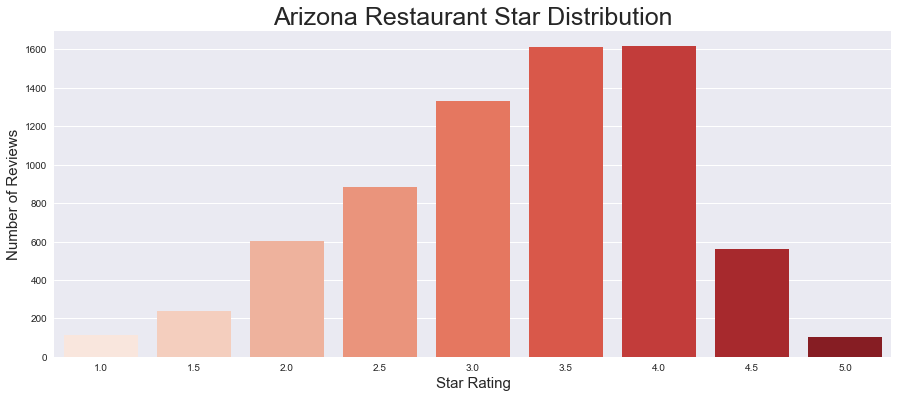

In [8]:
title = 'Arizona Restaurant Star Distribution'
plot_ratings(restaurants, title, 'Reds')

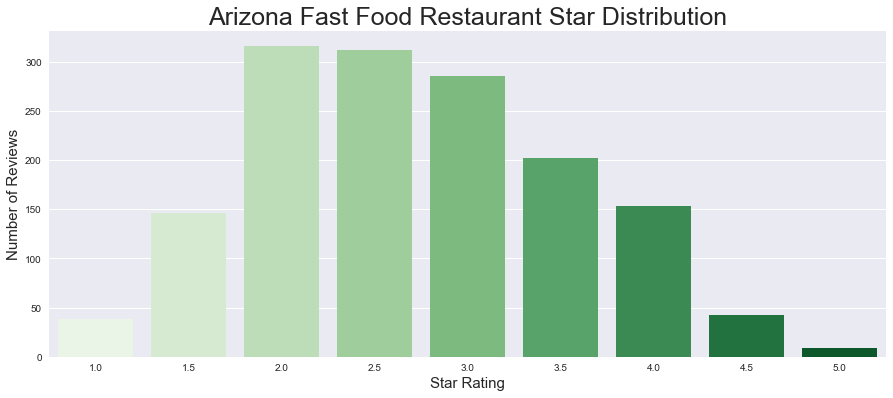

In [9]:
title = 'Arizona Fast Food Restaurant Star Distribution'
plot_ratings(ff_restaurants, title, 'Greens')

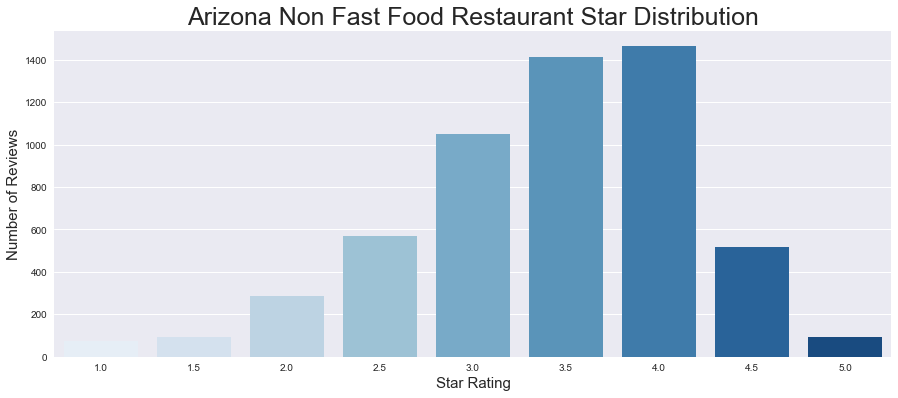

In [10]:
title = 'Arizona Non Fast Food Restaurant Star Distribution'
plot_ratings(nff_restaurants, title, 'Blues')

In [11]:
restaurants.head()

,address,business_id,categories,city,is_open,name,postal_code,review_count,stars,is_fast_food
0,"777 E Thunderbird Rd, Ste 107",1WBkAuQg81kokZIPMpn9Zg,"['burgers', 'restaurants']",Phoenix,1,Charr An American Burger Bar,85022.0,232,3.0,0
1,10720 E Southern Ave,kKx8iCJkomVQBdWHnmmOiA,"['restaurants', 'pizza']",Mesa,1,Little Caesars Pizza,85209.0,4,2.5,0
2,"8140 N Hayden Rd, Ste H115",VdlPZg2NAu8t8GkdbPLecg,"['restaurants', 'gluten-free', 'indian', 'seaf...",Scottsdale,1,Tandoori Times Indian Bistro,85258.0,263,3.5,0
3,2810 North 75th Ave,QkG3KUXwqZBW18A9k1xqCA,"['american_(traditional)', 'restaurants', 'sea...",Phoenix,1,Red Lobster,85035.0,37,2.5,0
4,1455 W Elliot Rd,nigYwB_m1TQ1WosjSWi-Hw,"['burgers', 'restaurants']",Gilbert,0,Simply Burgers,85233.0,5,3.0,0


# Inspect Restaurants by Category

In [12]:
def plot_category_closures(df, category, category_label, swarm=True):
    
    data = df[df.categories.apply(lambda x: category in x)].copy()
    
    if data.shape[0] > 100:
        
        category_label = category_label.replace('(', '').replace(')', '').replace('_', ' ')

        if swarm:
            g = sns.factorplot(x="stars", y="review_count", hue="is_open", col="is_fast_food", data=data, kind="swarm", size=6, aspect=1)
        else:
            g = sns.factorplot(x="stars", y="review_count", hue="is_open", col="is_fast_food", data=data, kind="box", size=6, aspect=1)

        g.fig.suptitle('{} Resturants'.format(category_label.title()), size=TITLE_FONT_SIZE)

        if DO_WRITE_CHARTS:
            if swarm:
                plt.savefig('../charts/categorical/{}_swarmplot.png'.format(category_label.lower().replace(' ', '_')))
            else:
                plt.savefig('../charts/categorical/{}_boxplot.png'.format(category_label.lower().replace(' ', '_')))
        else:
            plt.show()
            plt.close()

In [13]:
# get all unique categories

all_category_list = []
for sublist in [cat for cat in list(restaurants['categories'].values)]:
    sublist_parts = sublist.split("', '")
    
    for part in sublist_parts:
        part = part.strip("[]").strip("'")
        if len(part) > 1:
            all_category_list.append(part)
            
all_category_list = sorted(list(set(all_category_list)))

/Users/samgutentag/anaconda/envs/spring/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


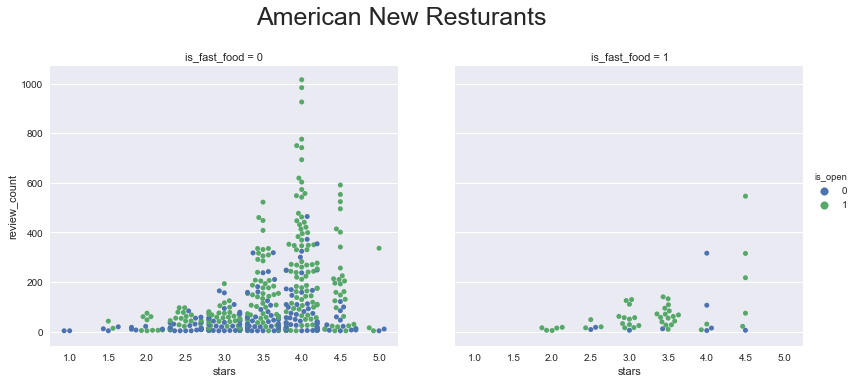

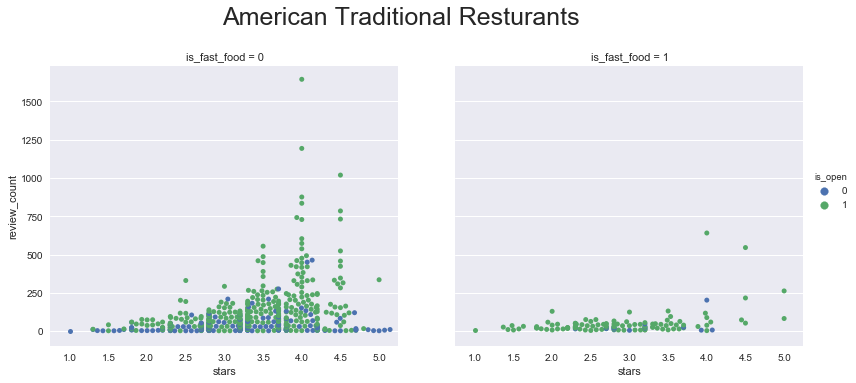

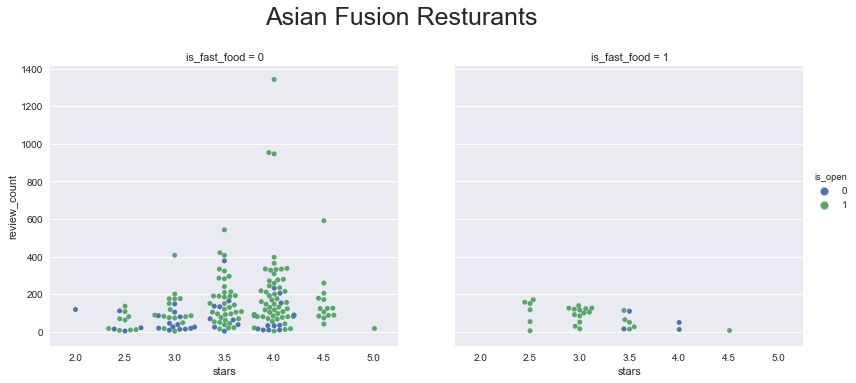

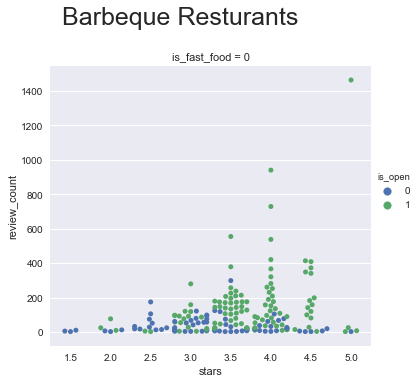

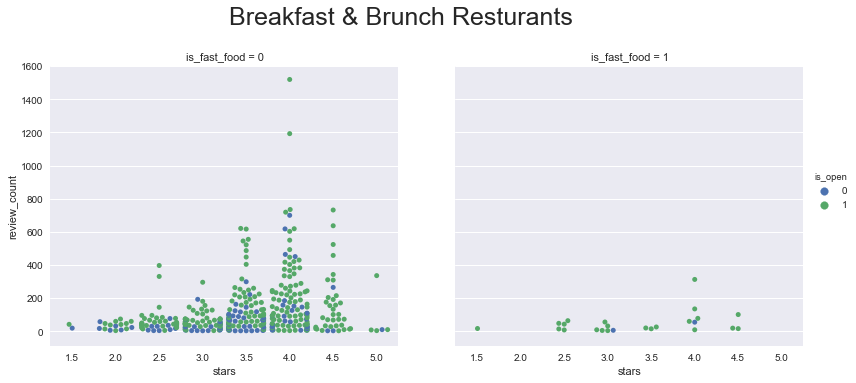

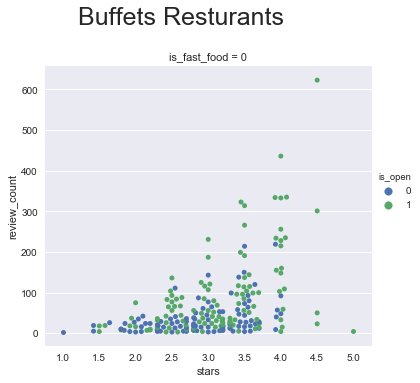

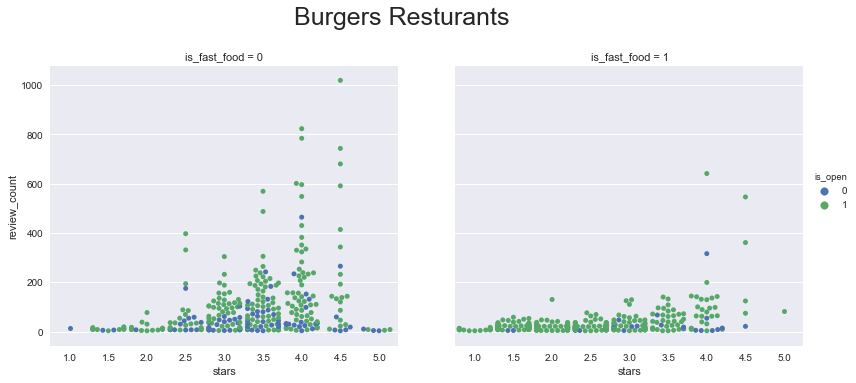

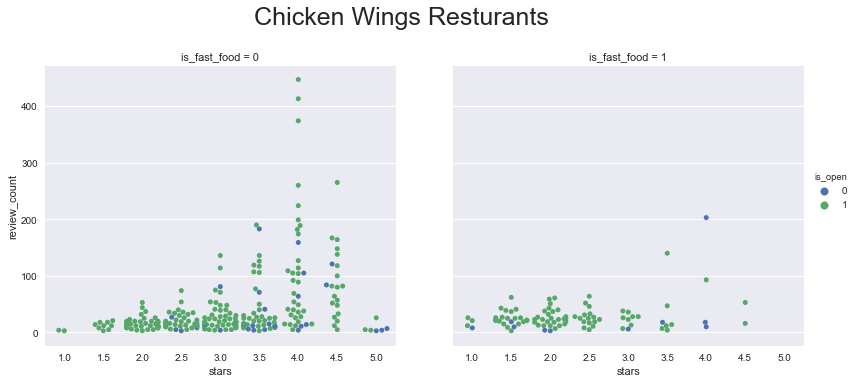

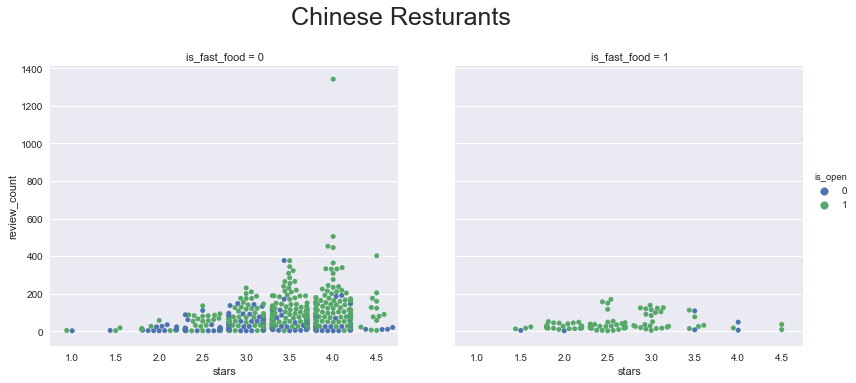

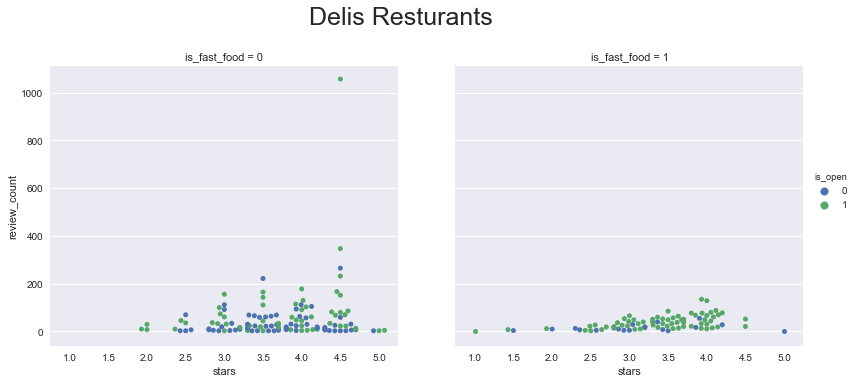

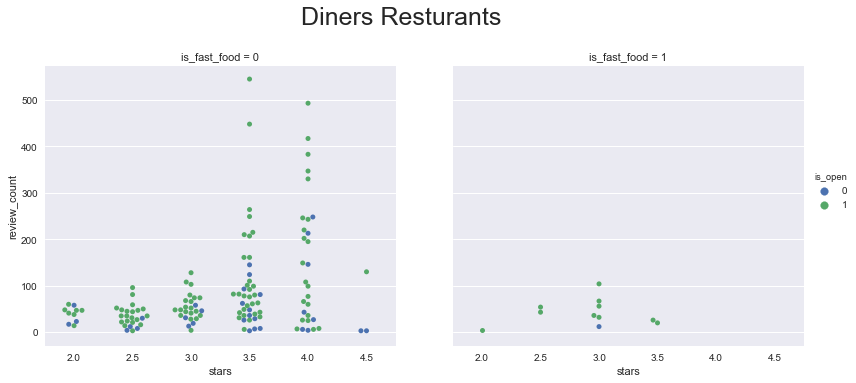

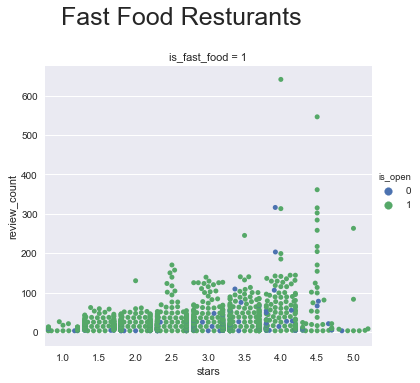

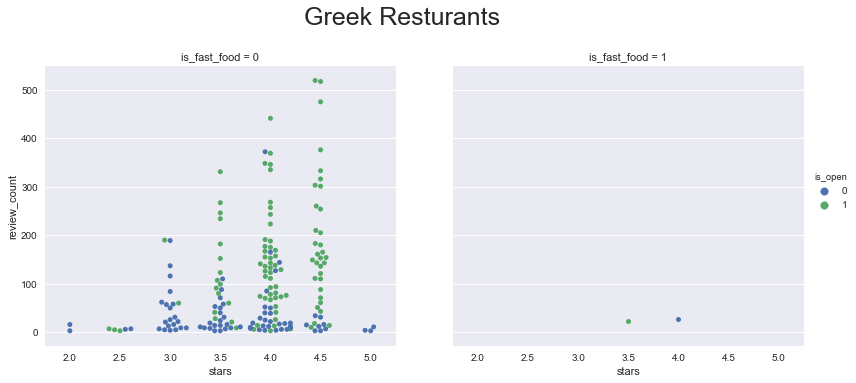

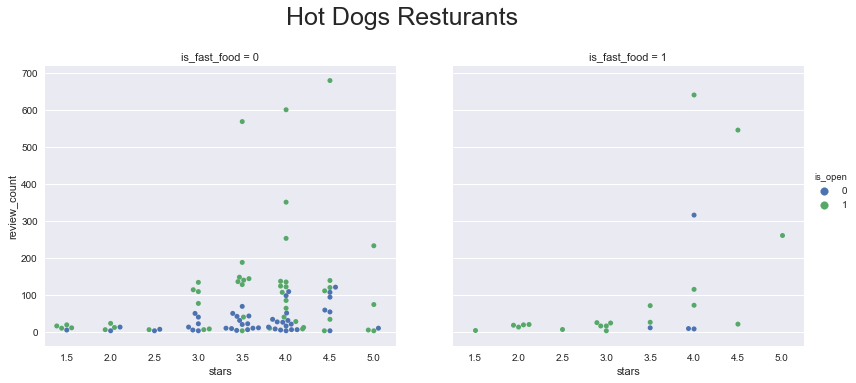

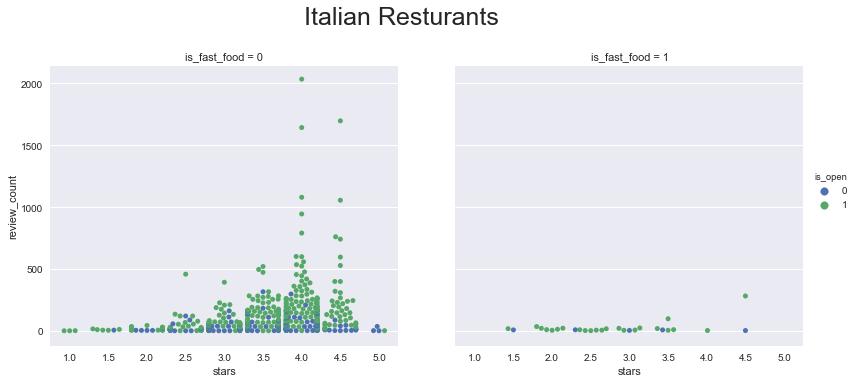

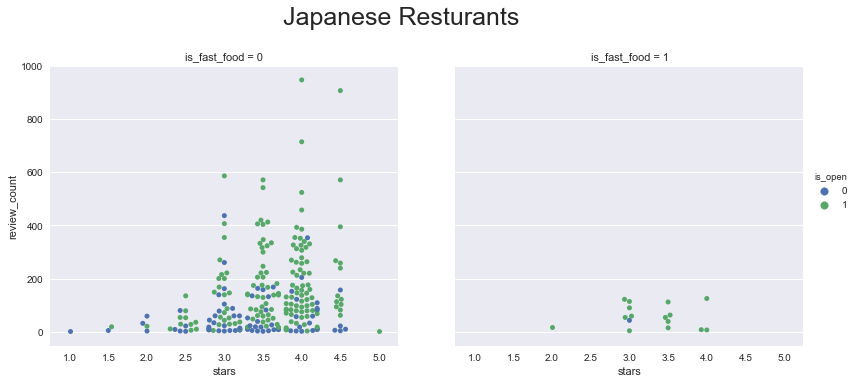

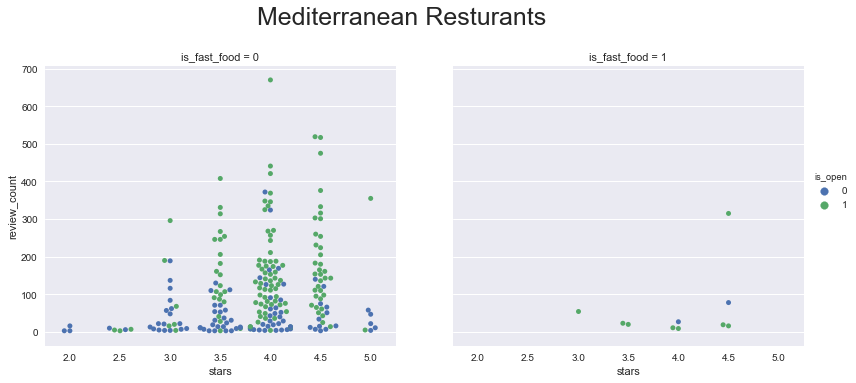

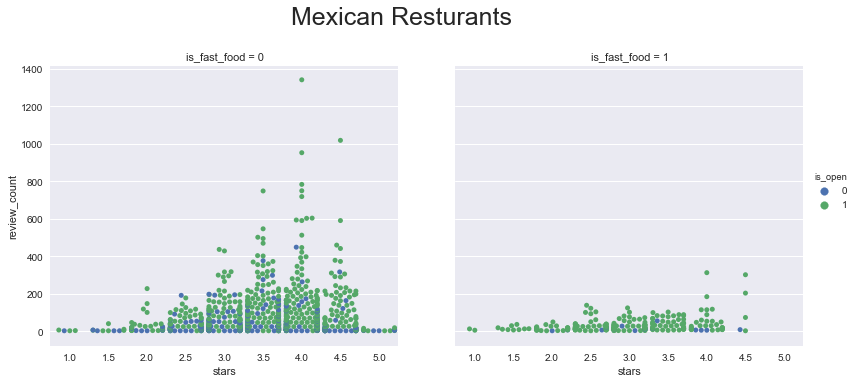

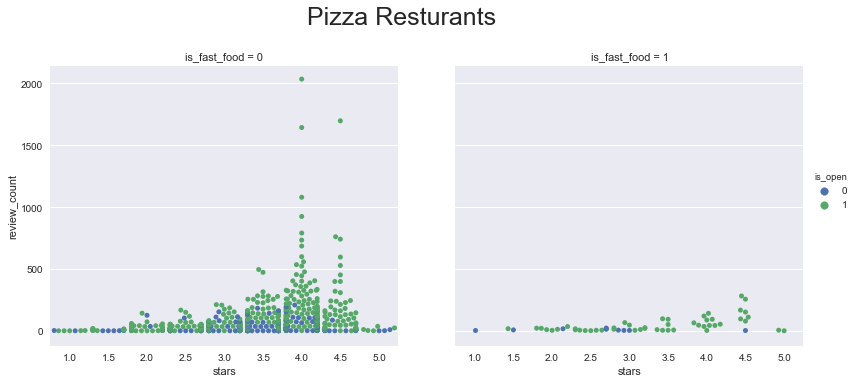

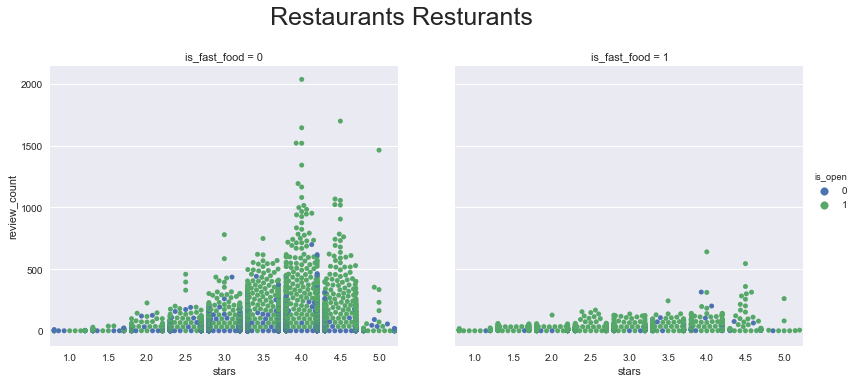

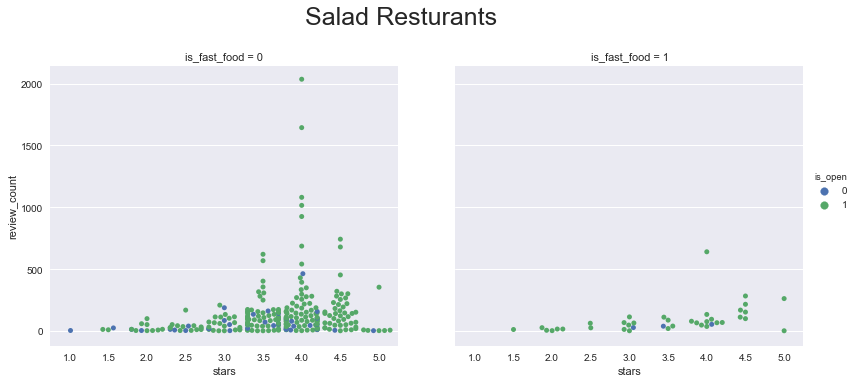

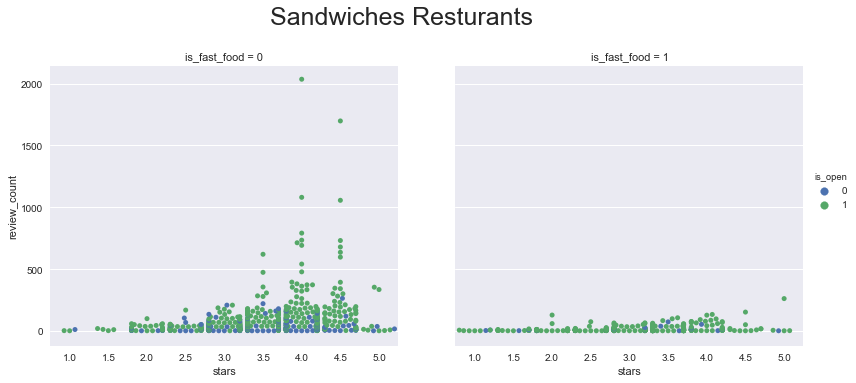

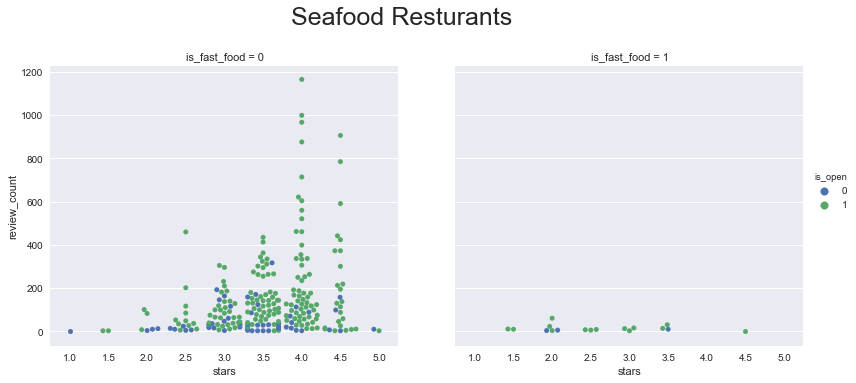

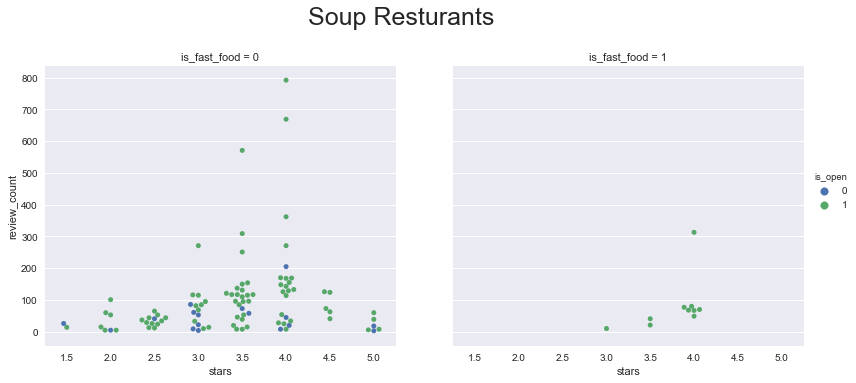

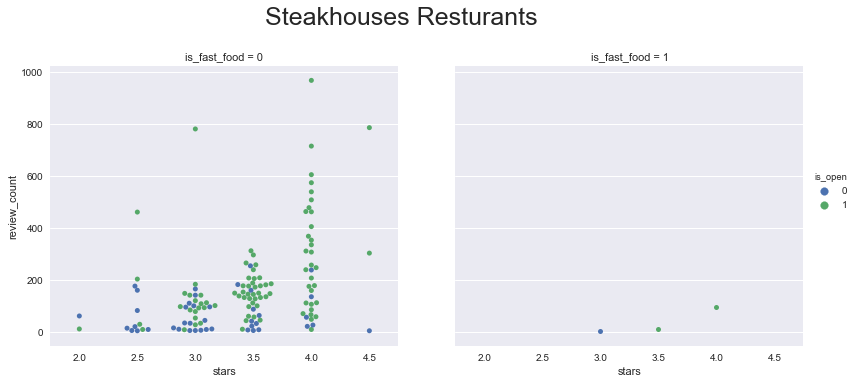

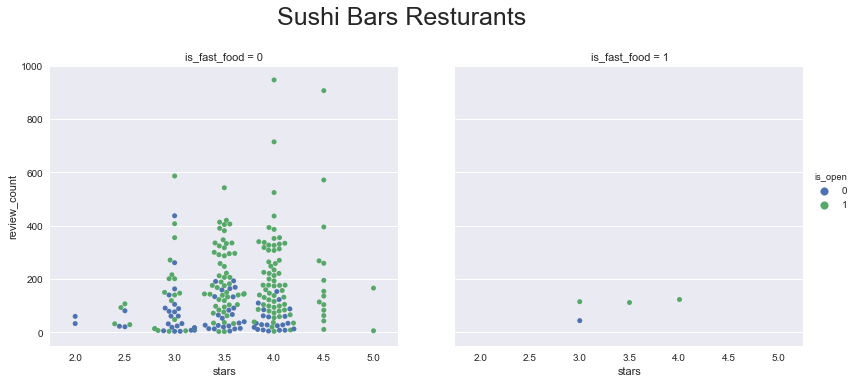

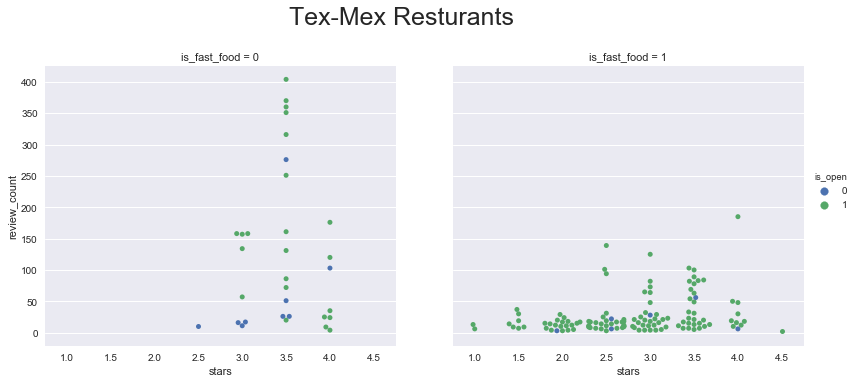

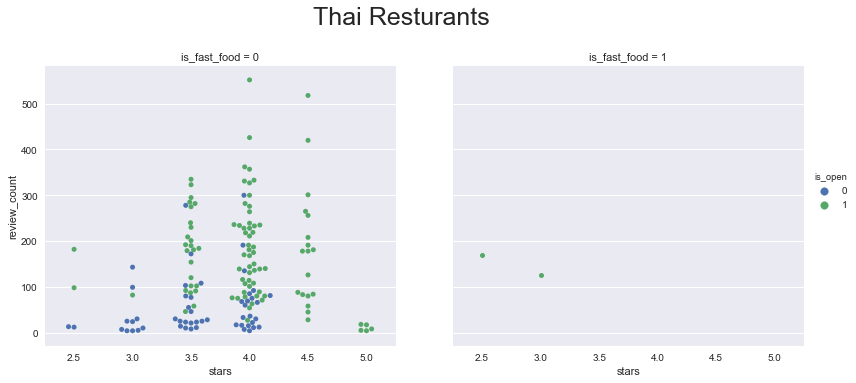

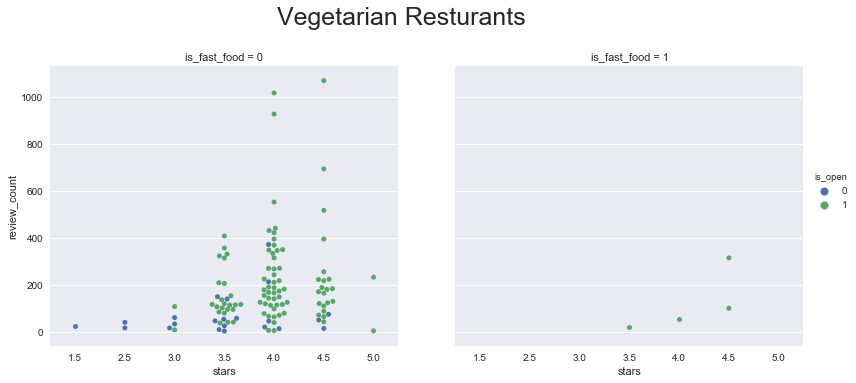

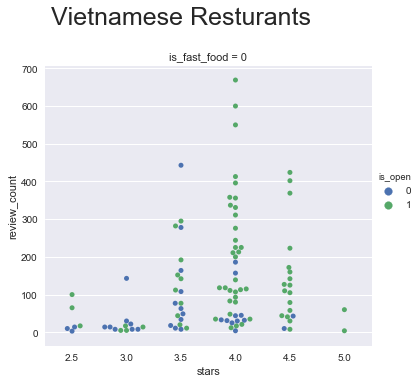

In [14]:
for cat in all_category_list:
    plot_category_closures(restaurants, cat, cat, swarm=True)
#     plot_category_closures(restaurants, cat, cat, swarm=False)